In [3]:
import pandas as pd

# Load the cleaned dataset
file_path = 'exported_data.xlsx'
elements_df = pd.read_excel(file_path)

# Convert 'Last Date' to datetime format
elements_df['Last Date'] = pd.to_datetime(elements_df['Last Date'], errors='coerce')

# Display the first few rows of the dataset and its structure
print(elements_df.head())
print(elements_df.columns)


      Id    Type                   Label First Name         Last Name  \
0  85040  person             Akaree Lain     Akaree              Lain   
1  78369  person             Lucas Green      Lucas             Green   
2  84783  person  Caden Bishop or Daniel      Caden  Bishop or Daniel   
3  78217  person            Jared Chavez      Jared            Chavez   
4  85352  person            Abby Wheeler       Abby           Wheeler   

                                         Description  Segment  \
0                                     I like food!!      2030   
1                                                NaN  Student   
2  I love God, my family, and my friends. I love ...     2030   
3                                                NaN     2025   
4                                                idk     2030   

                             Email Email 2 Email 3  ...  \
0     lainaka30@sthelens.k12.or.us     NaN     NaN  ...   
1    greenluc24@sthelens.k12.or.us     NaN     NaN  

In [4]:
# Filter for entries from the year 2024
elements_2024_df = elements_df[elements_df['Last Date'].dt.year == 2024]

# Display the shape and first few rows of the filtered dataset
print(elements_2024_df.shape)
print(elements_2024_df.head())


(934, 58)
       Id    Type                   Label First Name         Last Name  \
0   85040  person             Akaree Lain     Akaree              Lain   
2   84783  person  Caden Bishop or Daniel      Caden  Bishop or Daniel   
6   78592  person             Alex Meyers       Alex            Meyers   
7   85561  person             Caleb Clark      Caleb             Clark   
12  85253  person            Wayne Shelby      Wayne            Shelby   

                                          Description Segment  \
0                                      I like food!!     2030   
2   I love God, my family, and my friends. I love ...    2030   
6        I'm Alex they/it prns only, I love swimming     2026   
7   Hi, I'm Caleb Clark. I am 14 years old (15 in ...    2027   
12                                      i like soccer    2028   

                             Email Email 2 Email 3  ...  \
0     lainaka30@sthelens.k12.or.us     NaN     NaN  ...   
2   bishopcad30@sthelens.k12.or.us  

In [5]:
# Function to categorize time spent online
def categorize_online_time(time_spent):
    if pd.isnull(time_spent):
        return 'No response'
    elif 'less than an hour' in time_spent:
        return 'Less than 1 hour'
    elif '1 - 3 hours' in time_spent:
        return '1 - 3 hours'
    elif '4 - 6 hours' in time_spent:
        return '4 - 6 hours'
    elif '7 - 9 hours' in time_spent:
        return '7 - 9 hours'
    elif 'more than 9 hours' in time_spent:
        return 'More than 9 hours'
    else:
        return 'Other'  # Catch-all for unexpected values

# Apply the categorization function to the column
elements_2024_df['Online Time Category'] = elements_2024_df['How much time do you spend online?'].apply(categorize_online_time)

# Display the updated DataFrame to verify the new column
print(elements_2024_df[['How much time do you spend online?', 'Online Time Category']].head())


   How much time do you spend online? Online Time Category
0                   1 - 3 hours a day          1 - 3 hours
2                   4 - 6 hours a day          4 - 6 hours
6             more than 9 hours a day    More than 9 hours
7                   4 - 6 hours a day          4 - 6 hours
12                  4 - 6 hours a day          4 - 6 hours


/var/folders/9t/7rt0m2d561d_bf1kjzfvybkw0000gn/T/ipykernel_29205/618761668.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_2024_df['Online Time Category'] = elements_2024_df['How much time do you spend online?'].apply(categorize_online_time)


In [6]:
# Convert sense of belonging score to numeric
elements_2024_df['Belonging Barometer Number'] = pd.to_numeric(elements_2024_df['Belonging Barometer Number'], errors='coerce')

# Display the updated DataFrame to verify the numeric conversion
print(elements_2024_df[['Belonging Barometer Number']].head())


    Belonging Barometer Number
0                          3.8
2                          4.2
6                          NaN
7                          3.4
12                         3.7


/var/folders/9t/7rt0m2d561d_bf1kjzfvybkw0000gn/T/ipykernel_29205/844460944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_2024_df['Belonging Barometer Number'] = pd.to_numeric(elements_2024_df['Belonging Barometer Number'], errors='coerce')


In [7]:
# Filter for students spending more than 9 hours online
more_than_9_hours_df = elements_2024_df[elements_2024_df['Online Time Category'] == 'More than 9 hours']

# Display the shape and first few rows of the filtered dataset
print(more_than_9_hours_df.shape)
print(more_than_9_hours_df.head())


(75, 59)
       Id    Type             Label First Name Last Name  \
6   78592  person       Alex Meyers       Alex    Meyers   
14  85268  person        Gena Smith       Gena     Smith   
34  84970  person  Braeden Helgeson    Braeden  Helgeson   
42  78708  person     Raina Rohloff      Raina   Rohloff   
50  85069  person      Jack Luzader       Jack   Luzader   

                                          Description Segment  \
6        I'm Alex they/it prns only, I love swimming     2026   
14                                                NaN    2030   
34      im braeden liv put i picture of me i hate her    2028   
42  I like to read a lot. I love my friends like m...    2026   
50  My Name is Jack And Im 13 and My hobbie is Rid...    2029   

                               Email Email 2 Email 3  ...  \
6     meyersmat26@sthelens.k12.or.us     NaN     NaN  ...   
14     smithgen30@sthelens.k12.or.us     NaN     NaN  ...   
34  helgesonbra28@sthelens.k12.or.us     NaN     NaN  ..

In [8]:
# Descriptive statistics for students spending more than 9 hours online
print("Descriptive statistics for students spending more than 9 hours online:")
print(more_than_9_hours_df['Belonging Barometer Number'].describe())


Descriptive statistics for students spending more than 9 hours online:
count    59.000000
mean      2.962712
std       0.835195
min       1.000000
25%       2.500000
50%       2.900000
75%       3.600000
max       5.000000
Name: Belonging Barometer Number, dtype: float64


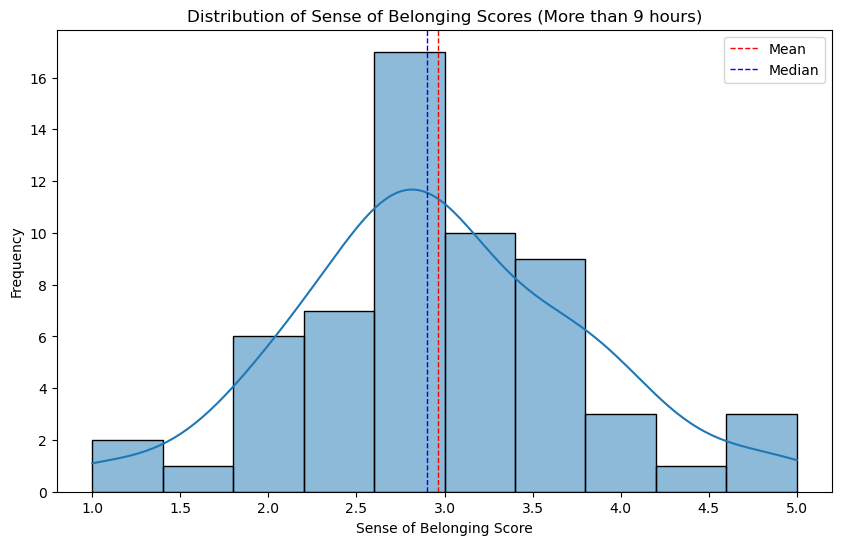

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of sense of belonging scores
plt.figure(figsize=(10, 6))
sns.histplot(more_than_9_hours_df['Belonging Barometer Number'], bins=10, kde=True)
plt.title('Distribution of Sense of Belonging Scores (More than 9 hours)')
plt.xlabel('Sense of Belonging Score')
plt.ylabel('Frequency')
plt.axvline(more_than_9_hours_df['Belonging Barometer Number'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(more_than_9_hours_df['Belonging Barometer Number'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()


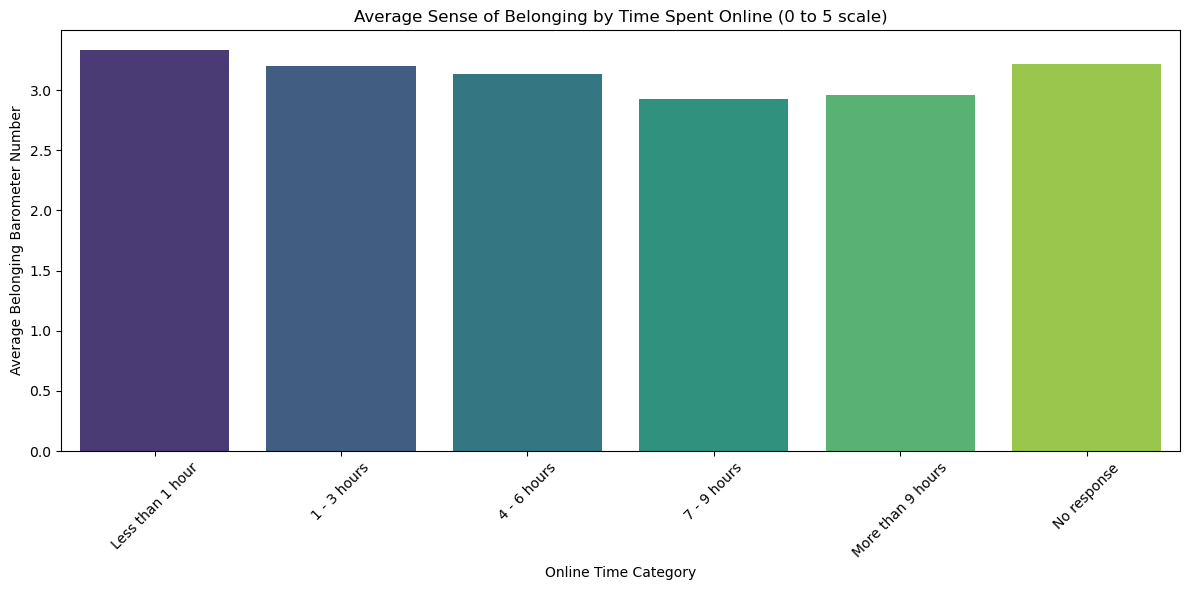

In [12]:
# Calculate the average sense of belonging score for each online time category
average_belonging = elements_2024_df.groupby('Online Time Category')['Belonging Barometer Number'].mean().reset_index()

# Define the order of the categories for plotting
category_order = [
    'Less than 1 hour',
    '1 - 3 hours',
    '4 - 6 hours',
    '7 - 9 hours',
    'More than 9 hours',
    'No response'
]

# Plotting the average sense of belonging by online time category
plt.figure(figsize=(12, 6))
sns.barplot(x='Online Time Category', y='Belonging Barometer Number', data=average_belonging, palette='viridis', order=category_order)
plt.title('Average Sense of Belonging by Time Spent Online (0 to 5 scale)')
plt.xlabel('Online Time Category')
plt.ylabel('Average Belonging Barometer Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


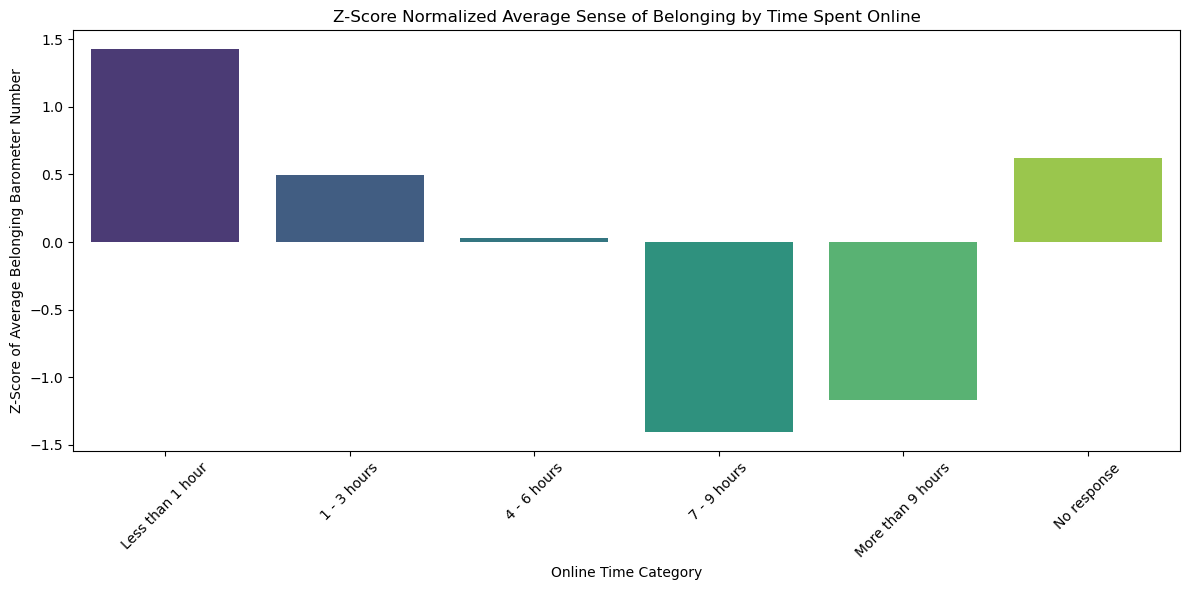

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Assuming you have already calculated the average belonging scores
# and have the 'average_belonging' DataFrame from the previous step.

# Calculate the z-scores for the average belonging scores
average_belonging['Z-Score'] = zscore(average_belonging['Belonging Barometer Number'])

# Define the order of the categories for plotting
category_order = [
    'Less than 1 hour',
    '1 - 3 hours',
    '4 - 6 hours',
    '7 - 9 hours',
    'More than 9 hours',
    'No response'
]

# Plotting the z-scores of average sense of belonging by online time category
plt.figure(figsize=(12, 6))
sns.barplot(x='Online Time Category', y='Z-Score', data=average_belonging, palette='viridis', order=category_order)
plt.title('Z-Score Normalized Average Sense of Belonging by Time Spent Online')
plt.xlabel('Online Time Category')
plt.ylabel('Z-Score of Average Belonging Barometer Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Descriptive statistics for students spending less than 1 hour and more than 9 hours
less_than_1_hour_df = elements_2024_df[elements_2024_df['Online Time Category'] == 'Less than 1 hour']
more_than_9_hours_df = elements_2024_df[elements_2024_df['Online Time Category'] == 'More than 9 hours']

print("Descriptive statistics for students spending less than 1 hour online:")
print(less_than_1_hour_df['Belonging Barometer Number'].describe())

print("\nDescriptive statistics for students spending more than 9 hours online:")
print(more_than_9_hours_df['Belonging Barometer Number'].describe())


Descriptive statistics for students spending less than 1 hour online:
count    30.000000
mean      3.330000
std       0.787466
min       1.100000
25%       3.225000
50%       3.400000
75%       3.600000
max       5.000000
Name: Belonging Barometer Number, dtype: float64

Descriptive statistics for students spending more than 9 hours online:
count    59.000000
mean      2.962712
std       0.835195
min       1.000000
25%       2.500000
50%       2.900000
75%       3.600000
max       5.000000
Name: Belonging Barometer Number, dtype: float64


In [18]:
# Compare demographic factors (assuming you have columns like 'Gender', 'Age', etc.)
demographics_comparison = elements_2024_df.groupby('Online Time Category')[['What is your gender?']].agg(pd.Series.mode)
print(demographics_comparison)


                     What is your gender?
Online Time Category                     
1 - 3 hours                        female
4 - 6 hours                          male
7 - 9 hours                        female
Less than 1 hour                   female
More than 9 hours                    male
No response                        female


/var/folders/9t/7rt0m2d561d_bf1kjzfvybkw0000gn/T/ipykernel_29205/3345391286.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_2024_df['Involved in Activities'] = elements_2024_df[activity_columns].apply(classify_involvement, axis=1)


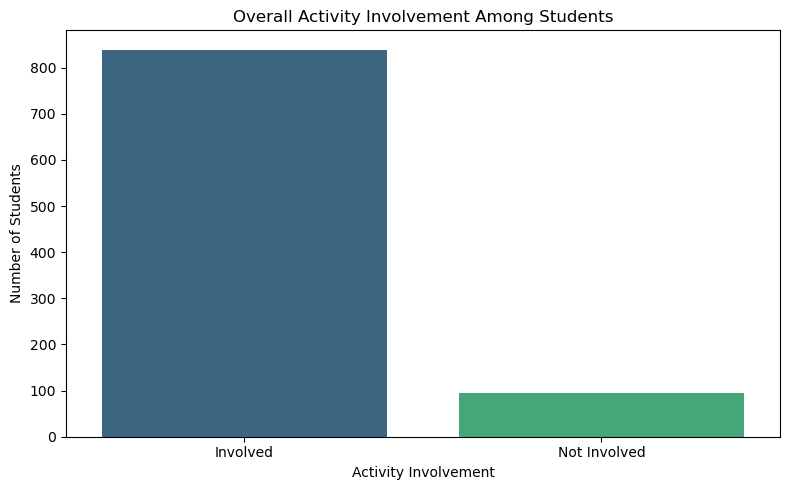

,Activity Involvement,Count
0,Involved,839
1,Not Involved,95


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'exported_data.xlsx'
elements_df = pd.read_excel(file_path)

# Step 1: Filter for entries from the year 2024
elements_2024_df = elements_df[pd.to_datetime(elements_df['Last Date'], errors='coerce').dt.year == 2024]

# Define the activity columns to combine
activity_columns = [
    'What High School clubs, activities, and/or sports do you participate in?',
    '(This is not a repeat question) What High School clubs, activities, and/or sports do you participate in that give you a strong and positive experience of belonging?',
    'What Middle School clubs, activities, and/or sports do you participate in?',
    '(This is not a repeat question) What Middle School clubs, activities, and/or sports do you participate in that give you a strong and positive experience of belonging?',
    'Clubs, activities, or sports'
]

# Define a focused set of non-involvement indicators
non_involvement_indicators = [
    'none', 'no', 'n', 'nun', 'nope', 
    'not involved', 'not applicable', 'not interested', 
    'nothing', "i don't know", 'nothin', 'idk', 
    'not participating', "don't participate", 'nil', 
    'nah', 'no thanks', 'not really', 'not active', 
    'never'
]

# Step 2: Create a function to classify involvement
def classify_involvement(row):
    # Check each activity response for non-involvement indicators
    for activity in row:
        if isinstance(activity, str):
            activity_lower = activity.lower()
            if activity_lower in non_involvement_indicators or activity_lower.strip() == '':
                return 'Not Involved'
    return 'Involved'  # If none of the responses indicate non-involvement

# Step 3: Apply the classification function to the relevant columns
elements_2024_df['Involved in Activities'] = elements_2024_df[activity_columns].apply(classify_involvement, axis=1)

# Step 4: Count the involvement
involvement_counts = elements_2024_df['Involved in Activities'].value_counts().reset_index()
involvement_counts.columns = ['Activity Involvement', 'Count']

# Step 5: Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x='Activity Involvement', y='Count', data=involvement_counts, palette='viridis')
plt.title('Overall Activity Involvement Among Students')
plt.xlabel('Activity Involvement')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# Display the involvement counts for debugging
involvement_counts


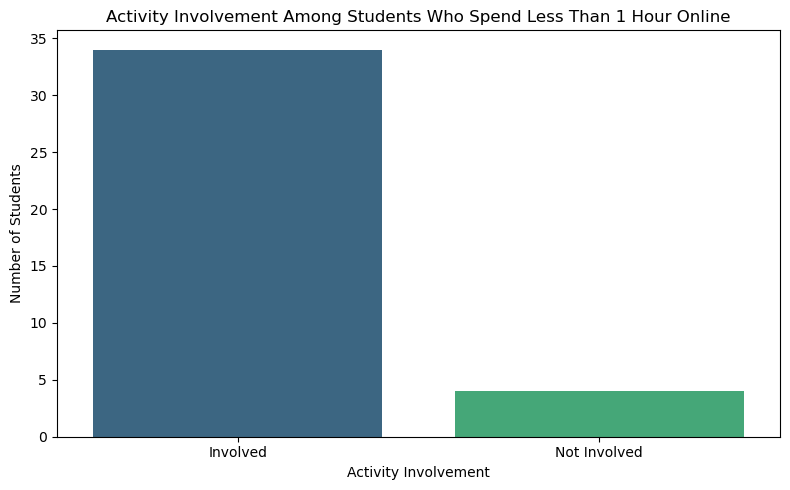

,Activity Involvement,Count
0,Involved,34
1,Not Involved,4


In [39]:
# Step 1: Filter for students who spent less than 1 hour online
less_than_1_hour_df = elements_2024_df[elements_2024_df['Time Spent Category'] == 'Less than 1 hour']

# Count involvement
less_than_1_hour_involvement_counts = less_than_1_hour_df['Involved in Activities'].value_counts().reset_index()
less_than_1_hour_involvement_counts.columns = ['Activity Involvement', 'Count']

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Activity Involvement', y='Count', data=less_than_1_hour_involvement_counts, palette='viridis')
plt.title('Activity Involvement Among Students Who Spend Less Than 1 Hour Online')
plt.xlabel('Activity Involvement')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# Display the counts for debugging
less_than_1_hour_involvement_counts


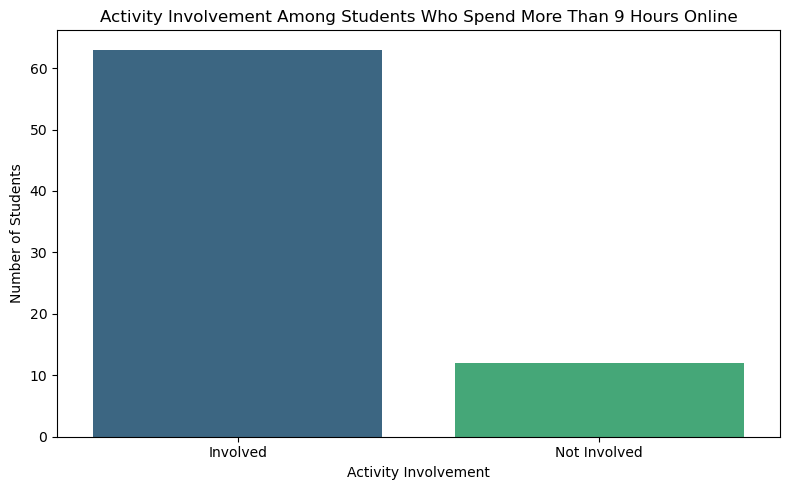

,Activity Involvement,Count
0,Involved,63
1,Not Involved,12


In [40]:
# Step 1: Filter for students who spent more than 9 hours online
more_than_9_hours_df = elements_2024_df[elements_2024_df['Time Spent Category'] == 'More than 9 hours']

# Count involvement
more_than_9_hours_involvement_counts = more_than_9_hours_df['Involved in Activities'].value_counts().reset_index()
more_than_9_hours_involvement_counts.columns = ['Activity Involvement', 'Count']

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Activity Involvement', y='Count', data=more_than_9_hours_involvement_counts, palette='viridis')
plt.title('Activity Involvement Among Students Who Spend More Than 9 Hours Online')
plt.xlabel('Activity Involvement')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# Display the counts for debugging
more_than_9_hours_involvement_counts


In [41]:
# Example for crosstab
crosstab_result = pd.crosstab(
    elements_2024_df['Time Spent Category'],
    elements_2024_df['Involved in Activities'],
    margins=True
)
print(crosstab_result)


Involved in Activities  Involved  Not Involved  All
Time Spent Category                                
1 - 3 hours                  205            28  233
4 - 6 hours                  272            41  313
7 - 9 hours                   56             9   65
Less than 1 hour              34             4   38
More than 9 hours             63            12   75
No Response                  209             1  210
All                          839            95  934


/var/folders/9t/7rt0m2d561d_bf1kjzfvybkw0000gn/T/ipykernel_29205/158994585.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_2024_df['Involved in Activities'] = elements_2024_df[activity_columns].apply(classify_involvement, axis=1)


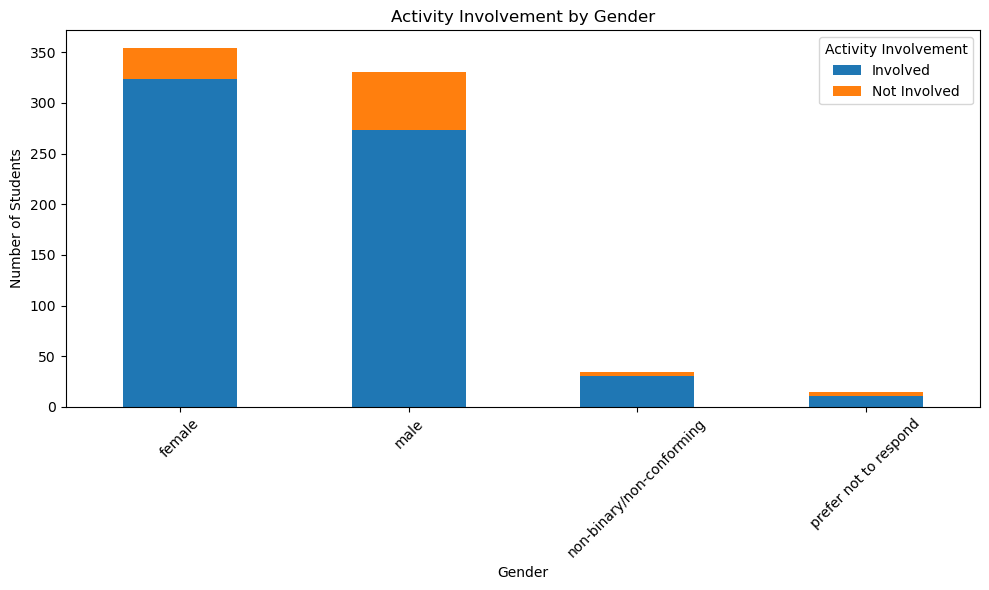

Involved in Activities,Involved,Not Involved
What is your gender?,,
female,324,30
male,273,58
non-binary/non-conforming,31,3
prefer not to respond,11,4


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'exported_data.xlsx'
elements_df = pd.read_excel(file_path)

# Step 1: Filter for entries from the year 2024
elements_2024_df = elements_df[pd.to_datetime(elements_df['Last Date'], errors='coerce').dt.year == 2024]

# Step 2: Create the involvement column as previously done
activity_columns = [
    'What High School clubs, activities, and/or sports do you participate in?',
    '(This is not a repeat question) What High School clubs, activities, and/or sports do you participate in that give you a strong and positive experience of belonging?',
    'What Middle School clubs, activities, and/or sports do you participate in?',
    '(This is not a repeat question) What Middle School clubs, activities, and/or sports do you participate in that give you a strong and positive experience of belonging?',
    'Clubs, activities, or sports'
]

non_involvement_indicators = [
    'none', 'no', 'n', 'nun', 'nope', 
    'not involved', 'not applicable', 'not interested', 
    'nothing', "i don't know", 'nothin', 'idk', 
    'not participating', "don't participate", 'nil', 
    'nah', 'no thanks', 'not really', 'not active', 
    'never'
]

def classify_involvement(row):
    for activity in row:
        if isinstance(activity, str):
            activity_lower = activity.lower()
            if activity_lower in non_involvement_indicators or activity_lower.strip() == '':
                return 'Not Involved'
    return 'Involved'

elements_2024_df['Involved in Activities'] = elements_2024_df[activity_columns].apply(classify_involvement, axis=1)

# Step 3: Count involvement by gender
gender_involvement_counts = elements_2024_df.groupby(['What is your gender?', 'Involved in Activities']).size().unstack().fillna(0)

# Step 4: Plotting the results
gender_involvement_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Activity Involvement by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Activity Involvement', labels=['Involved', 'Not Involved'])
plt.tight_layout()
plt.show()

# Display the counts for debugging
gender_involvement_counts


/var/folders/9t/7rt0m2d561d_bf1kjzfvybkw0000gn/T/ipykernel_29205/3792716232.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_2024_df['Involved in Activities'] = elements_2024_df[activity_columns].apply(classify_involvement, axis=1)
/var/folders/9t/7rt0m2d561d_bf1kjzfvybkw0000gn/T/ipykernel_29205/3792716232.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elements_2024_df['Belonging Barometer Number'] = pd.to_numeric(elements_2024_df['Belonging Barometer Number'], errors='coerce')


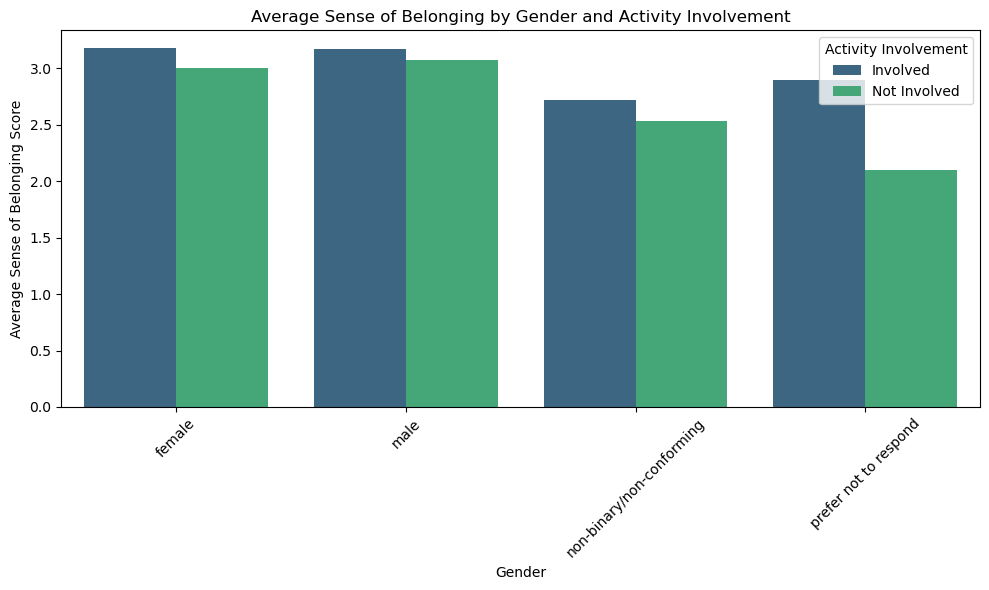

        What is your gender? Involved in Activities  \
0                     female               Involved   
1                     female           Not Involved   
2                       male               Involved   
3                       male           Not Involved   
4  non-binary/non-conforming               Involved   
5  non-binary/non-conforming           Not Involved   
6      prefer not to respond               Involved   
7      prefer not to respond           Not Involved   

   Belonging Barometer Number  
0                    3.179070  
1                    3.003704  
2                    3.176279  
3                    3.077551  
4                    2.724000  
5                    2.533333  
6                    2.900000  
7                    2.100000  


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'exported_data.xlsx'
elements_df = pd.read_excel(file_path)

# Step 1: Filter for entries from the year 2024
elements_2024_df = elements_df[pd.to_datetime(elements_df['Last Date'], errors='coerce').dt.year == 2024]

# Step 2: Create the involvement column as previously done
activity_columns = [
    'What High School clubs, activities, and/or sports do you participate in?',
    '(This is not a repeat question) What High School clubs, activities, and/or sports do you participate in that give you a strong and positive experience of belonging?',
    'What Middle School clubs, activities, and/or sports do you participate in?',
    '(This is not a repeat question) What Middle School clubs, activities, and/or sports do you participate in that give you a strong and positive experience of belonging?',
    'Clubs, activities, or sports'
]

non_involvement_indicators = [
    'none', 'no', 'n', 'nun', 'nope', 
    'not involved', 'not applicable', 'not interested', 
    'nothing', "i don't know", 'nothin', 'idk', 
    'not participating', "don't participate", 'nil', 
    'nah', 'no thanks', 'not really', 'not active', 
    'never'
]

def classify_involvement(row):
    for activity in row:
        if isinstance(activity, str):
            activity_lower = activity.lower()
            if activity_lower in non_involvement_indicators or activity_lower.strip() == '':
                return 'Not Involved'
    return 'Involved'

elements_2024_df['Involved in Activities'] = elements_2024_df[activity_columns].apply(classify_involvement, axis=1)

# Step 3: Calculate average sense of belonging by gender and involvement status
elements_2024_df['Belonging Barometer Number'] = pd.to_numeric(elements_2024_df['Belonging Barometer Number'], errors='coerce')
average_belonging = elements_2024_df.groupby(['What is your gender?', 'Involved in Activities'])['Belonging Barometer Number'].mean().reset_index()

# Step 4: Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=average_belonging, x='What is your gender?', y='Belonging Barometer Number', hue='Involved in Activities', palette='viridis')
plt.title('Average Sense of Belonging by Gender and Activity Involvement')
plt.xlabel('Gender')
plt.ylabel('Average Sense of Belonging Score')
plt.legend(title='Activity Involvement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the average belonging for debugging
print(average_belonging)


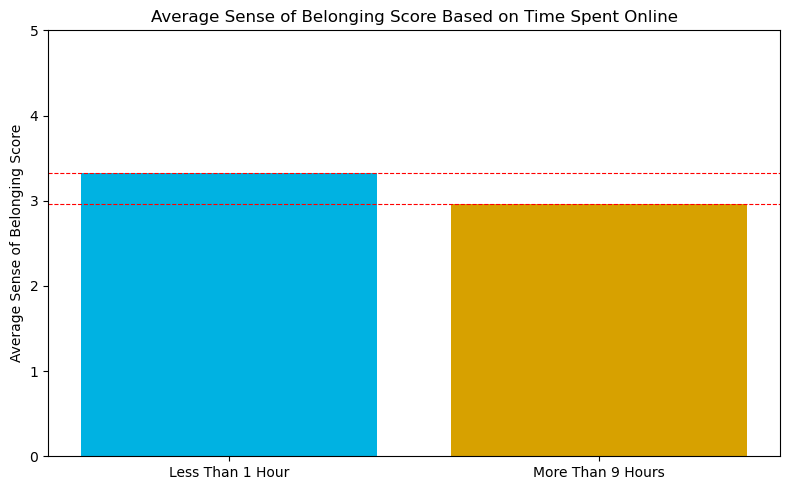

Average Sense of Belonging for students spending less than 1 hour online: 3.33
Average Sense of Belonging for students spending more than 9 hours online: 2.96


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
less_than_1_df = pd.read_excel('lessthan1.xlsx')
more_than_9_df = pd.read_excel('morethan9.xlsx')

# Calculate the average sense of belonging scores
average_belonging_less_than_1 = less_than_1_df['Belonging Barometer Number'].mean()
average_belonging_more_than_9 = more_than_9_df['Belonging Barometer Number'].mean()

# Prepare data for visualization
categories = ['Less Than 1 Hour', 'More Than 9 Hours']
average_scores = [average_belonging_less_than_1, average_belonging_more_than_9]

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, average_scores, color=['#00B2E2', '#D7A100'])  # Set specific colors
plt.title('Average Sense of Belonging Score Based on Time Spent Online')
plt.ylabel('Average Sense of Belonging Score')
plt.ylim(0, 5)  # Assuming the score is on a scale of 0 to 5

# Show the average lines
for bar in bars:
    plt.axhline(y=bar.get_height(), color='red', linestyle='--', linewidth=0.8)

# Show the plot
plt.tight_layout()
plt.show()

# Output the average belonging scores
print(f'Average Sense of Belonging for students spending less than 1 hour online: {average_belonging_less_than_1:.2f}')
print(f'Average Sense of Belonging for students spending more than 9 hours online: {average_belonging_more_than_9:.2f}')


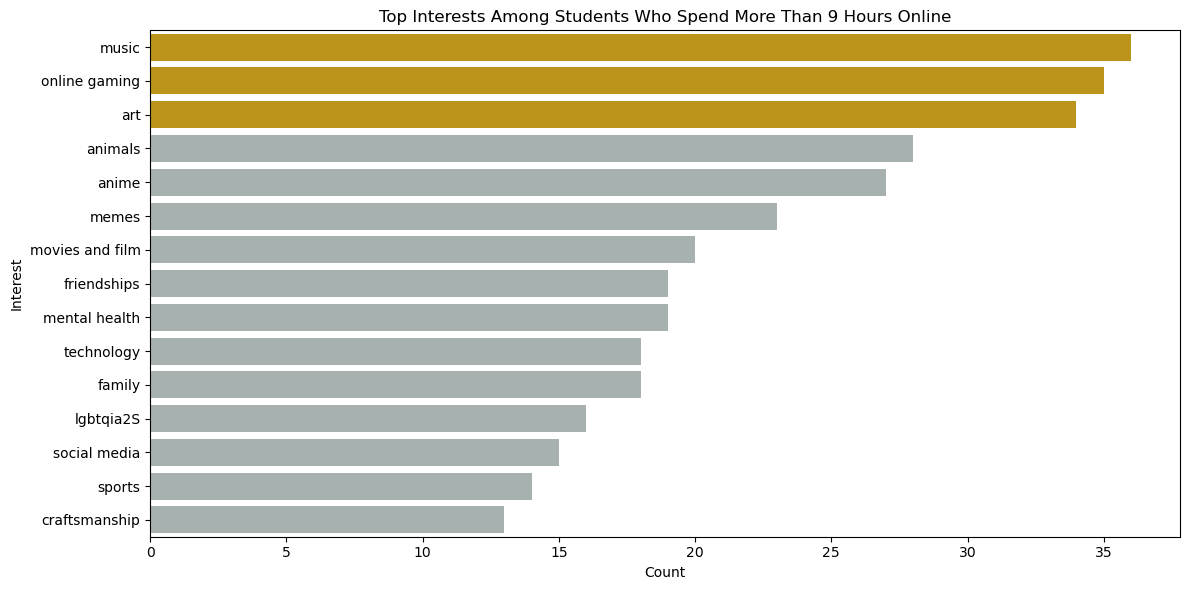

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Combine interests into a single string for analysis
interests_series = more_than_9_df['What issues or topics are you most interested in?'].dropna()
combined_interests = [interest.split('|') for interest in interests_series]
flat_interests = [item.strip() for sublist in combined_interests for item in sublist]

# Count occurrences of each interest
interest_counts = Counter(flat_interests)

# Create a DataFrame for visualization
interest_df = pd.DataFrame(interest_counts.items(), columns=['Interest', 'Count']).sort_values(by='Count', ascending=False)

# Define the custom color palette
# Darker colors for specific interests
custom_palette = ['#D7A100' if interest in ['music', 'online gaming', 'art'] else '#A5B3B0' for interest in interest_df['Interest']]

# Visualization of interests
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Interest', data=interest_df.head(15), palette=custom_palette)
plt.title('Top Interests Among Students Who Spend More Than 9 Hours Online')
plt.xlabel('Count')
plt.ylabel('Interest')
plt.tight_layout()
plt.show()


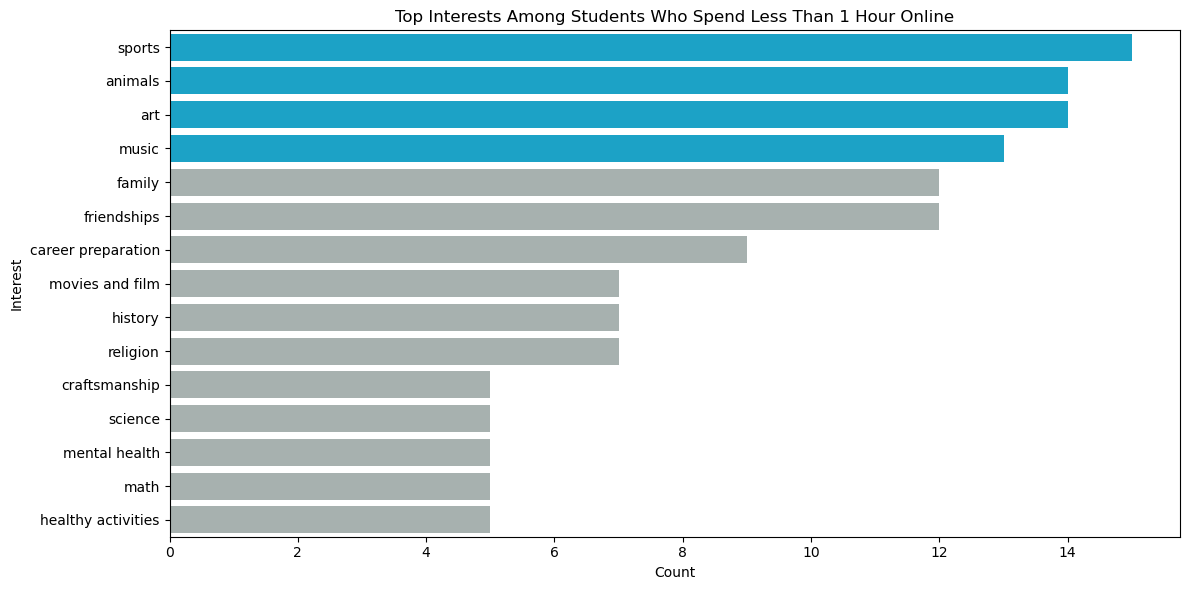

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Combine interests into a single string for analysis
interests_series = less_than_1_df['What issues or topics are you most interested in?'].dropna()
combined_interests = [interest.split('|') for interest in interests_series]
flat_interests = [item.strip() for sublist in combined_interests for item in sublist]

# Count occurrences of each interest
interest_counts = Counter(flat_interests)

# Create a DataFrame for visualization
interest_df = pd.DataFrame(interest_counts.items(), columns=['Interest', 'Count']).sort_values(by='Count', ascending=False)

# Define a custom color palette for all interests
colors = ['#D7A100', '#4D6F38', '#4B3F29', '#A5B3B0', '#673B98', '#00B2E2']
custom_palette = ['#00B2E2'if interest in ['sports','animals','music', 'art'] else '#A5B3B0' for interest in interest_df['Interest']]

# Visualization of interests
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Interest', data=interest_df.head(15), palette=custom_palette[:15])  # Take the first 15 colors
plt.title('Top Interests Among Students Who Spend Less Than 1 Hour Online')
plt.xlabel('Count')
plt.ylabel('Interest')
plt.tight_layout()
plt.show()


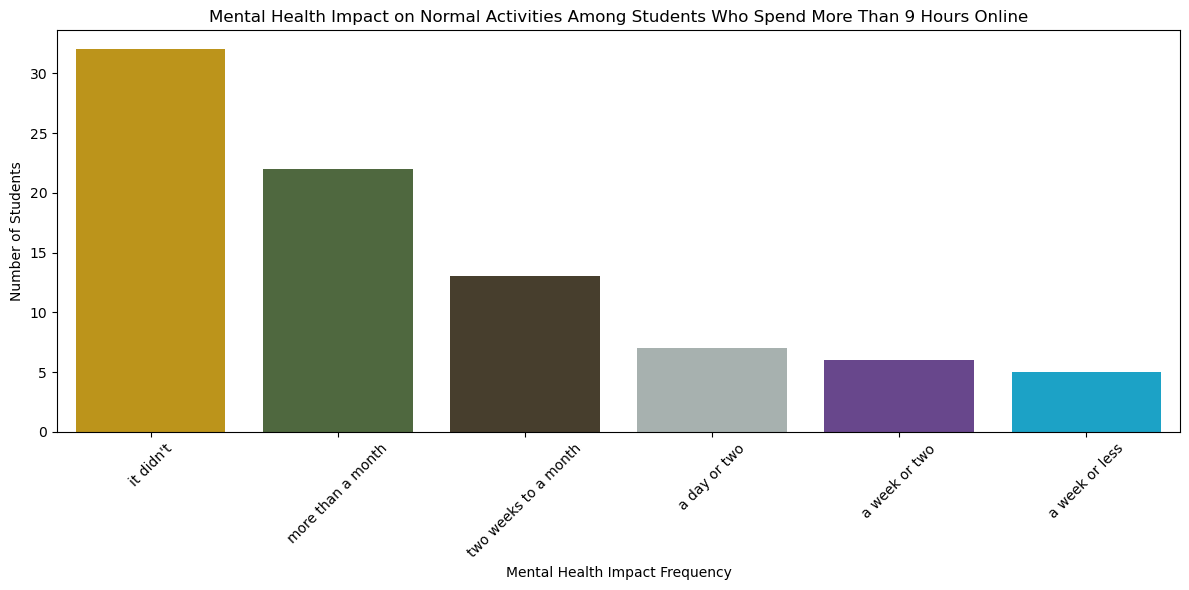

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the relevant columns for mental health impact
mental_health_column = 'How often in the last 12 months did your mental health keep you from participating in your normal activities and relationships?'
impact_counts = more_than_9_df[mental_health_column].value_counts()

# Create a DataFrame for visualization
impact_df = impact_counts.reset_index()
impact_df.columns = ['Mental Health Impact', 'Count']

# Define a color palette
custom_palette = ['#D7A100', '#4D6F38', '#4B3F29', '#A5B3B0', '#673B98', '#00B2E2']

# Visualization of mental health impact
plt.figure(figsize=(12, 6))
sns.barplot(x='Mental Health Impact', y='Count', data=impact_df, palette=custom_palette)
plt.title('Mental Health Impact on Normal Activities Among Students Who Spend More Than 9 Hours Online')
plt.xlabel('Mental Health Impact Frequency')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


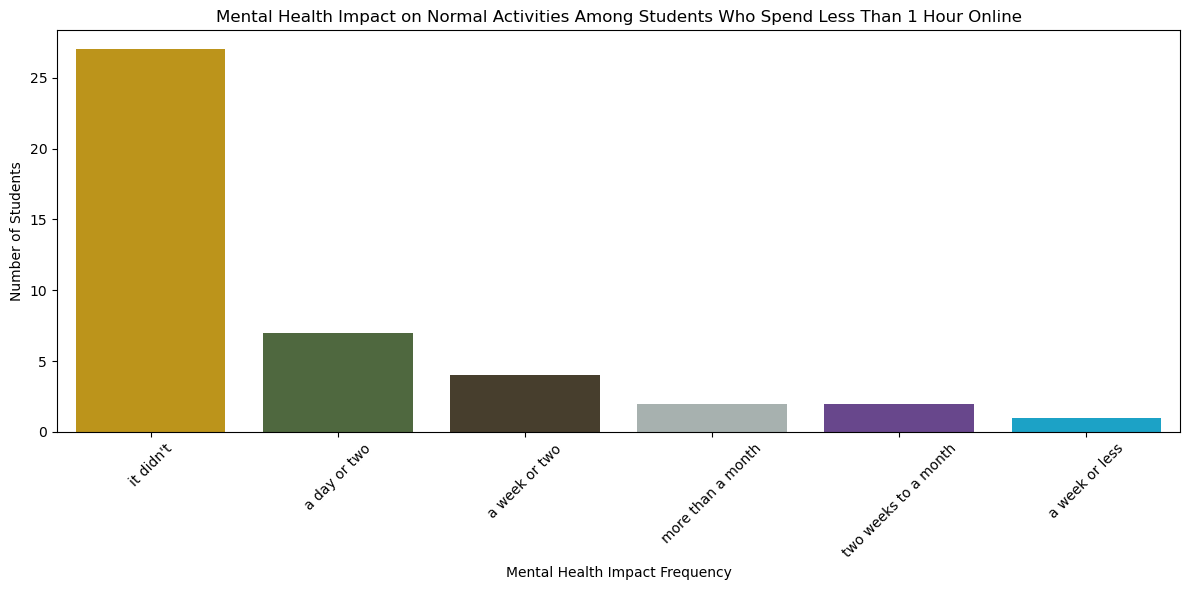

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the relevant columns for mental health impact
mental_health_column = 'How often in the last 12 months did your mental health keep you from participating in your normal activities and relationships?'
impact_counts = less_than_1_df[mental_health_column].value_counts()

# Create a DataFrame for visualization
impact_df = impact_counts.reset_index()
impact_df.columns = ['Mental Health Impact', 'Count']

# Define a color palette
custom_palette = ['#D7A100', '#4D6F38', '#4B3F29', '#A5B3B0', '#673B98', '#00B2E2']

# Visualization of mental health impact
plt.figure(figsize=(12, 6))
sns.barplot(x='Mental Health Impact', y='Count', data=impact_df, palette=custom_palette)
plt.title('Mental Health Impact on Normal Activities Among Students Who Spend Less Than 1 Hour Online')
plt.xlabel('Mental Health Impact Frequency')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
